importing the dependencies


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics




In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Data collection and analysis

In [ ]:
Data=pd.read_excel(r'/content/gdrive/My Drive/train.csv.xlsx')

In [ ]:
display(pd.DataFrame(Data))

,item_identifier,item_weight,item_fat_content,item_visibility,item_type,item_MRP,outlet_Identifier,outlet_establishment_year,outlet-Size,outlet_location_type,outlet_type,item_outlet_sales
0,FDA15,9.30,low Fat,0.016047,Dairy,249.8092,OUT049,1999,medium,Tier1,supermarket type1,3735.1380
1,DRC01,5.92,Regular,0.019278,soft drinks,48.2692,OUT018,2009,medium,Tier3,supermarket type2,443.4228
2,FDN15,17.50,low Fat,0.016760,meat,141.6180,OUT049,1999,medium,Tier1,supermarket type1,2097.2700
3,FDX07,19.20,Regular,0.000000,fruits,182.0950,OUT010,1998,NAN,Tier3,Grocery store,732.3800
4,NCD19,8.93,low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier3,supermarket type1,994.7052


In [ ]:
#number of data points and number of features
Data.shape

(5, 12)

In [ ]:
#getting some information about the dataset
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   item_identifier            5 non-null      object 
 1   item_weight                5 non-null      float64
 2   item_fat_content           5 non-null      object 
 3   item_visibility            5 non-null      float64
 4   item_type                  5 non-null      object 
 5   item_MRP                   5 non-null      float64
 6   outlet_Identifier          5 non-null      object 
 7   outlet_establishment_year  5 non-null      int64  
 8   outlet-Size                5 non-null      object 
 9   outlet_location_type       5 non-null      object 
 10  outlet_type                5 non-null      object 
 11  item_outlet_sales          5 non-null      float64
dtypes: float64(4), int64(1), object(7)
memory usage: 608.0+ bytes


Categorical features:


*   item_identifier

*   item_fat_content

*   item_type

*   outlet_identifier
*   outlet_size


*   outlet_location_type


*   outlet_type


  












In [ ]:
#checking for missing values
Data.isnull().sum()

item_identifier              0
item_weight                  0
item_fat_content             0
item_visibility              0
item_type                    0
item_MRP                     0
outlet_Identifier            0
outlet_establishment_year    0
outlet-Size                  0
outlet_location_type         0
outlet_type                  0
item_outlet_sales            0
dtype: int64

Handling Missing Values




*   Mean-->average value

*   Mode-->Most repeated value






In [ ]:
#mean value of "item_weight" column
Data['item_weight'].mean()

12.17

In [ ]:
#filling the misssing values in"item_weight" column with "mean" value
Data["item_weight"].fillna(Data["item_weight"].mean(), inplace=True)

In [ ]:
#checking for missing values
Data.isnull().sum()

item_identifier              0
item_weight                  0
item_fat_content             0
item_visibility              0
item_type                    0
item_MRP                     0
outlet_Identifier            0
outlet_establishment_year    0
outlet-Size                  0
outlet_location_type         0
outlet_type                  0
item_outlet_sales            0
dtype: int64

Data Analysis

In [ ]:
#statistical measures about the data
Data.describe()

,item_weight,item_visibility,item_MRP,outlet_establishment_year,item_outlet_sales
count,5.000000,5.000000,5.000000,5.000000,5.000000
mean,12.170000,0.010417,135.130560,1998.400000,1600.583200
std,5.822946,0.009585,85.948398,7.797435,1347.489064
min,5.920000,0.000000,48.269200,1987.000000,443.422800
25%,8.930000,0.000000,53.861400,1998.000000,732.380000
50%,9.300000,0.016047,141.618000,1999.000000,994.705200
75%,17.500000,0.016760,182.095000,1999.000000,2097.270000
max,19.200000,0.019278,249.809200,2009.000000,3735.138000


Numerical Features

In [ ]:
sns.set()

<ipython-input-19-60894350ae15>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Data['item_weight'])


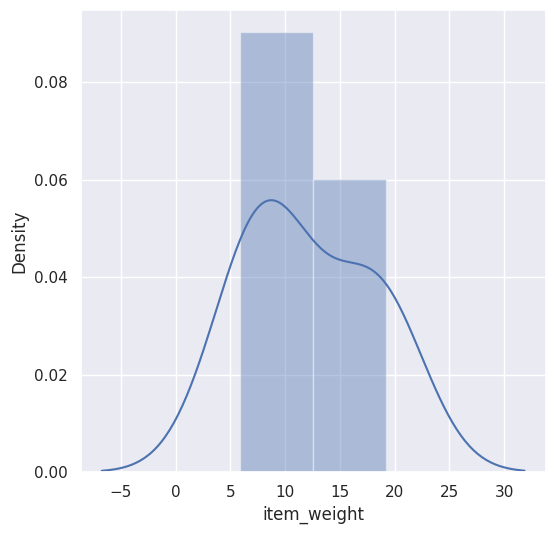

In [ ]:
#item_weight distribution
plt.figure(figsize=(6,6))
sns.distplot(Data['item_weight'])
plt.show()

<ipython-input-21-d643ebae8ff9>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Data['item_visibility'])


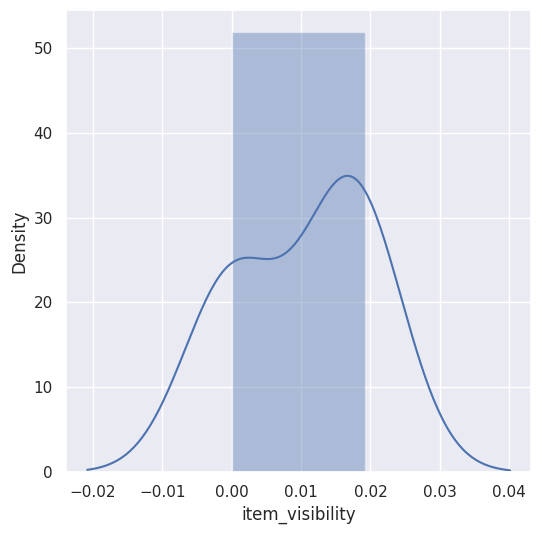

In [ ]:
#item_visibility distribution
plt.figure(figsize=(6,6))
sns.distplot(Data['item_visibility'])
plt.show()

<ipython-input-22-ab82a67a4280>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Data['item_MRP'])


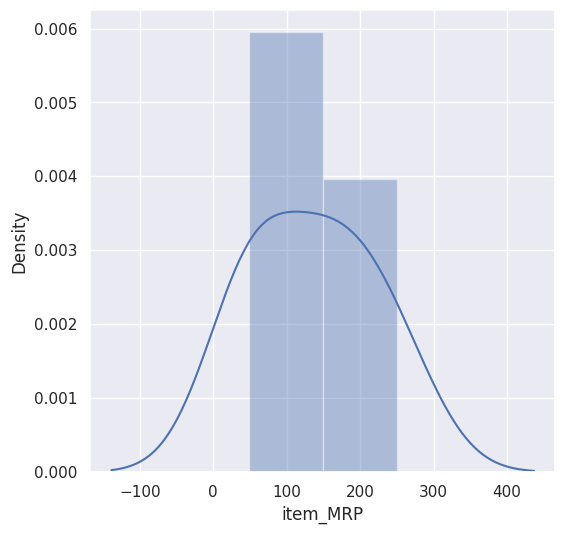

In [ ]:
#item_MRP distribution
plt.figure(figsize=(6,6))
sns.distplot(Data['item_MRP'])
plt.show()

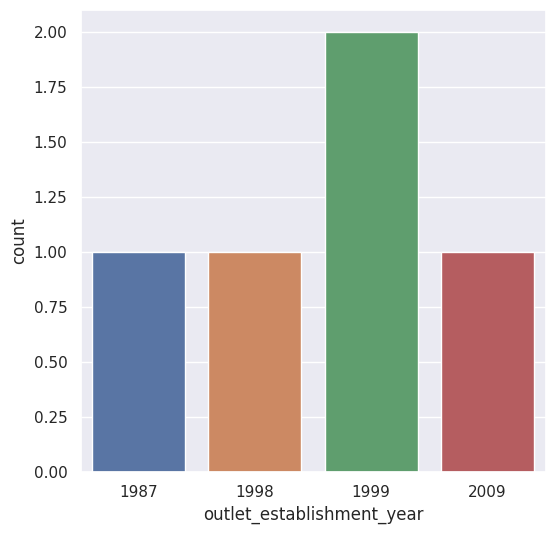

In [ ]:
#outlet_establishment_year column
plt.figure(figsize=(6,6))
sns.countplot(x='outlet_establishment_year',data=Data)
plt.show()

categorical Features

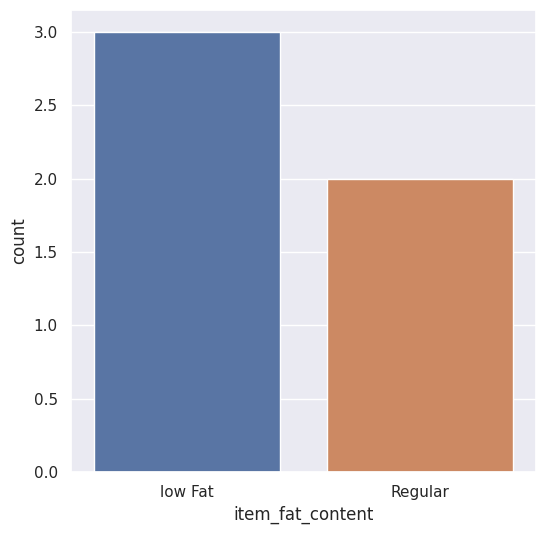

In [ ]:
#item_fat_content column
plt.figure(figsize=(6,6))
sns.countplot(x='item_fat_content',data=Data)
plt.show()

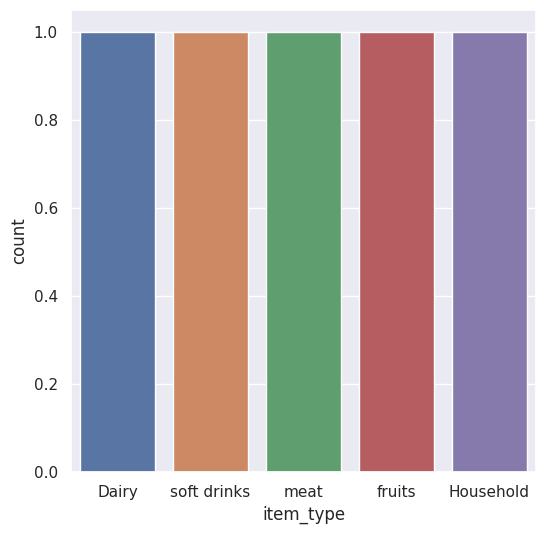

In [ ]:
#item_type column
plt.figure(figsize=(6,6))
sns.countplot(x='item_type',data=Data)
plt.show()


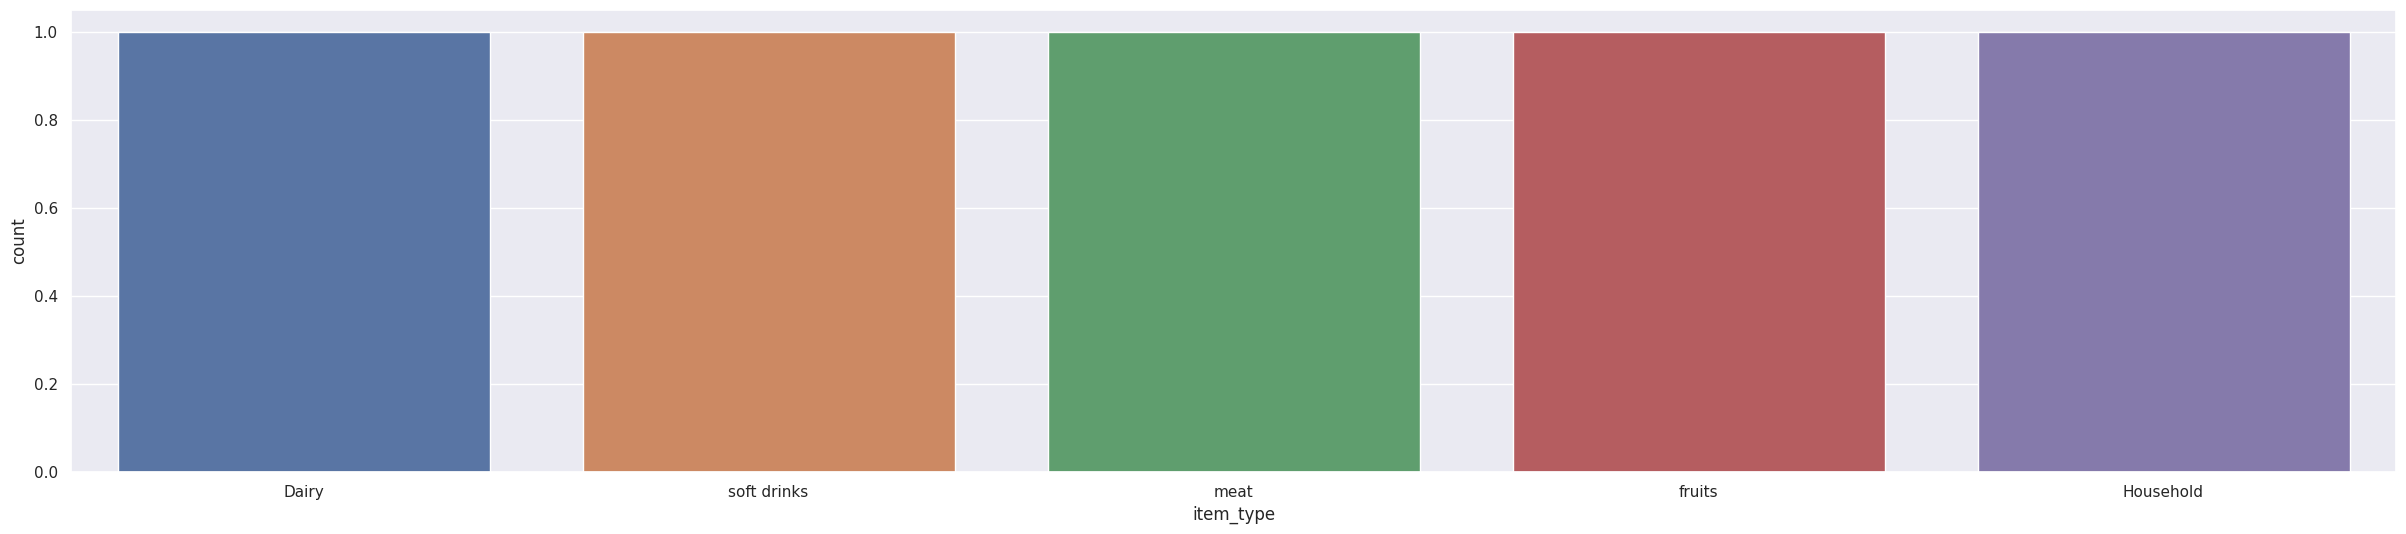

In [ ]:
#item_type_column
plt.figure(figsize=(30,6))
sns.countplot(x='item_type',data=Data)
plt.show()

Data PreProcessing

In [ ]:
Data.head()

,item_identifier,item_weight,item_fat_content,item_visibility,item_type,item_MRP,outlet_Identifier,outlet_establishment_year,outlet-Size,outlet_location_type,outlet_type,item_outlet_sales
0,FDA15,9.30,low Fat,0.016047,Dairy,249.8092,OUT049,1999,medium,Tier1,supermarket type1,3735.1380
1,DRC01,5.92,Regular,0.019278,soft drinks,48.2692,OUT018,2009,medium,Tier3,supermarket type2,443.4228
2,FDN15,17.50,low Fat,0.016760,meat,141.6180,OUT049,1999,medium,Tier1,supermarket type1,2097.2700
3,FDX07,19.20,Regular,0.000000,fruits,182.0950,OUT010,1998,NAN,Tier3,Grocery store,732.3800
4,NCD19,8.93,low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier3,supermarket type1,994.7052


In [ ]:
Data['item_fat_content'].value_counts()

low Fat    3
Regular    2
Name: item_fat_content, dtype: int64

Label Encoding

In [ ]:
encoder=LabelEncoder()


In [ ]:
Data['item_identifier']=encoder.fit_transform(Data['item_identifier'])

Data['item_fat_content']=encoder.fit_transform(Data['item_fat_content'])

Data['item_type']=encoder.fit_transform(Data['item_type'])

Data['outlet_Identifier']=encoder.fit_transform(Data['outlet_Identifier'])

Data['outlet-Size']=encoder.fit_transform(Data['outlet-Size'])

Data['outlet_location_type']=encoder.fit_transform(Data['outlet_location_type'])

Data['outlet_type']=encoder.fit_transform(Data['outlet_type'])

In [ ]:
Data.head()

,item_identifier,item_weight,item_fat_content,item_visibility,item_type,item_MRP,outlet_Identifier,outlet_establishment_year,outlet-Size,outlet_location_type,outlet_type,item_outlet_sales
0,1,9.30,1,0.016047,0,249.8092,3,1999,2,0,1,3735.1380
1,0,5.92,0,0.019278,4,48.2692,2,2009,2,1,2,443.4228
2,2,17.50,1,0.016760,3,141.6180,3,1999,2,0,1,2097.2700
3,3,19.20,0,0.000000,2,182.0950,0,1998,1,1,0,732.3800
4,4,8.93,1,0.000000,1,53.8614,1,1987,0,1,1,994.7052


Splittting features and Target

In [ ]:
x=Data.drop(columns='item_outlet_sales',axis=1)
y=Data['item_outlet_sales']

In [ ]:
print(x)

   item_identifier  item_weight  item_fat_content  item_visibility  item_type  \
0                1         9.30                 1         0.016047          0   
1                0         5.92                 0         0.019278          4   
2                2        17.50                 1         0.016760          3   
3                3        19.20                 0         0.000000          2   
4                4         8.93                 1         0.000000          1   

   item_MRP  outlet_Identifier  outlet_establishment_year  outlet-Size  \
0  249.8092                  3                       1999            2   
1   48.2692                  2                       2009            2   
2  141.6180                  3                       1999            2   
3  182.0950                  0                       1998            1   
4   53.8614                  1                       1987            0   

   outlet_location_type  outlet_type  
0                     0      

In [ ]:
print(y)

0    3735.1380
1     443.4228
2    2097.2700
3     732.3800
4     994.7052
Name: item_outlet_sales, dtype: float64


Splitting the data into Training data and Testing data

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [ ]:
print(x.shape,x_train.shape,x_test.shape)

(5, 11) (4, 11) (1, 11)


Machine Learning Model Training 

XGBoost Regressor

In [ ]:
regressor=XGBRegressor()


In [ ]:
regressor.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

Evaluation

In [ ]:
#prediction on training data
training_data_prediction=regressor.predict(x_train)

In [ ]:
# R square value
r2_train=metrics.r2_score(y_train,training_data_prediction)

In [ ]:
print('R squared value=',r2_train)

R squared value= 0.9999999999996734


In [ ]:
#prediction on test data
test_data_prediction=regressor.predict(x_test)

In [ ]:
# R squared value
r2_test=metrics.r2_score(y_test,test_data_prediction)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


In [ ]:
print('R squared value=',r2_test)

R squared value= nan
